In [48]:
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot as plt
import pandas as pd
import databaseconfig as cfg

In [49]:
conn = psycopg2.connect(host=cfg.mysql['host'],port=5433,database=cfg.mysql['db'], user=cfg.mysql['user'], password=cfg.mysql['password'])

In [52]:
df = pd.read_sql_query("""select title as Title, Avg(salary) as Average_Salary from titles join salaries on titles.emp_no = salaries.emp_no group by title""", con=conn)
df

,title,average_salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


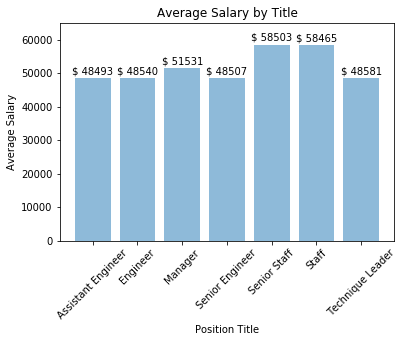

In [100]:
plt.bar(df['title'], df['average_salary'], align='center', alpha=0.5)
for x,y in zip(df['title'], df['average_salary']):

    label = "$ {:.0f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,4),
                 ha='center')

plt.title("Average Salary by Title")
plt.xlabel("Position Title")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.ylim(0.0, 65000.0)
plt.show()